In [35]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'house-prices-in-lavasa:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2422584%2F4095790%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240817%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240817T151236Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1d5fb729657f03a7221ce4a9b84b841477cd956b8ffd92c245486297e00fddf2086c7b1922ffd055ea5a6dd81799da55ec2db7753877da35cf99b94cc223fce513145ee931f47b247f45e5a57f51004bf92b37feba26aeaa0ec7f257eeafee2af3a80eb5d92232f1db65c52d84e76660e89ecce6782aa53ea2322e1ab3265c1320bb74df3b3238ff2a171addfd32f55e5b9296d225b816932db770852ee76c3de57f0c75f1b457132dbb7b9ef68861ecae8570b7fb683a286bf20d4ce1a1a82d941ecf02bc78741fd111e9c0655605314dc5f935de69ce6cd8a87b2bf080e3f44cce552a23d30532631e672e9d4ce12bcec9fcfcb6918f8df0870dbbf0769924'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 7629 bytes downloaded
Downloaded and uncompressed: house-prices-in-lavasa
Data source import complete.


 # Prediction of Numeric Values

#Definition

I used Pandas to Import the Dataset

I used the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.

Finally show the Regression Score, Intercept and other parameters etc in the Output

I also used visualizations and plots wherever possible
and formatted the output; Do Conclusion

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
df=pd.read_csv("../input/house-prices-in-lavasa/HousePrices.csv")
df

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0


In [38]:
# Showing 1st 10 rows
df[["NoOfBath","NoOfPeople"]]

,NoOfBath,NoOfPeople
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
995,4,6
996,4,5
997,4,5
998,7,6


In [39]:
# Showing 1st 5 rows
df.head(5)

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0


In [40]:
df.tail(5)

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0
999,Super Furnished Villa,Portofino B,7 BHK,6300.0,6,6,3,96000.0


In [41]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BuildingType  1000 non-null   object 
 1   Location      1000 non-null   object 
 2   Size          1000 non-null   object 
 3   AreaSqFt      1000 non-null   float64
 4   NoOfBath      1000 non-null   int64  
 5   NoOfPeople    1000 non-null   int64  
 6   NoOfBalcony   1000 non-null   int64  
 7   RentPerMonth  1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [42]:
display(df.describe().round(2))

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1548.27,2.66,2.17,1.54,10476.63
std,1345.14,1.25,0.96,0.84,10509.51
min,375.00,1.00,1.00,0.00,1100.00
25%,1090.00,2.00,2.00,1.00,4890.50
50%,1270.00,2.00,2.00,2.00,7000.00
75%,1664.25,3.00,2.00,2.00,11925.00
max,35000.00,11.00,6.00,3.00,96000.00


In [43]:
# Types of each columns of the dataset
df.dtypes

,0
BuildingType,object
Location,object
Size,object
AreaSqFt,float64
NoOfBath,int64
NoOfPeople,int64
NoOfBalcony,int64
RentPerMonth,float64


In [44]:
# Shape or dimension of the dataset
df.shape

(1000, 8)

In [45]:
# all column names of the dataset
df.columns

Index(['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony', 'RentPerMonth'],
      dtype='object')

In [46]:
# Showing True where the value is NaN
df.isnull()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [47]:
# Count of total NaN values of each column
df.isnull().sum()

,0
BuildingType,0
Location,0
Size,0
AreaSqFt,0
NoOfBath,0
NoOfPeople,0
NoOfBalcony,0
RentPerMonth,0


In [48]:
# Summary of the dataset
df.describe()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [49]:
# Grouped a column with mean to another columns
df.groupby('Size')['AreaSqFt'].mean()

,AreaSqFt
Size,
1 BHK,670.294118
1 RK,477.500000
2 BHK,1132.487203
3 BHK,1753.385269
4 BHK,2644.805825
5 BHK,2331.090909
6 BHK,1829.238095
7 BHK,2660.714286
8 BHK,2093.750000


In [50]:
# Count the duplicated data
df.duplicated().sum()

6

In [51]:
# Showing that rows whose values are duplicated
df[df.duplicated()]

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
8,Semi Furnished Single Room,School Street,1 BHK,645.0,1,1,1,1645.0
37,Semi Furnished Single Room,School Street,2 BHK,1015.0,2,1,2,2588.0
40,Minimum Budget Rooms,Portofino A,1 BHK,525.0,1,1,1,2600.0
190,Semi Furnished Single Room,Portofino A,2 BHK,883.0,2,1,1,4500.0
354,Semi Furnished Single Room,Clubview Road,3 BHK,1464.0,3,2,2,5600.0
450,Semi Furnished Flat,School Street,2 BHK,1200.0,2,2,1,6500.0


In [52]:
df['Location'] = df['Location'].replace(['Portofino A','Portofino B','Portofino C','Portofino D','Portofino E','Portofino F','Portofino G','Portofino H'],'Portofino')
df

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino,6 BHK,5100.0,7,6,3,90000.0


In [53]:
#df['BuildingType'] = df['BuildingType'].astype(object)

df1=df[['AreaSqFt', 'NoOfBalcony', 'RentPerMonth']]
df1.skew()

,0
AreaSqFt,16.025687
NoOfBalcony,-0.011505
RentPerMonth,3.477116


In [54]:
# Relationship among the features
#df.corr()

[]

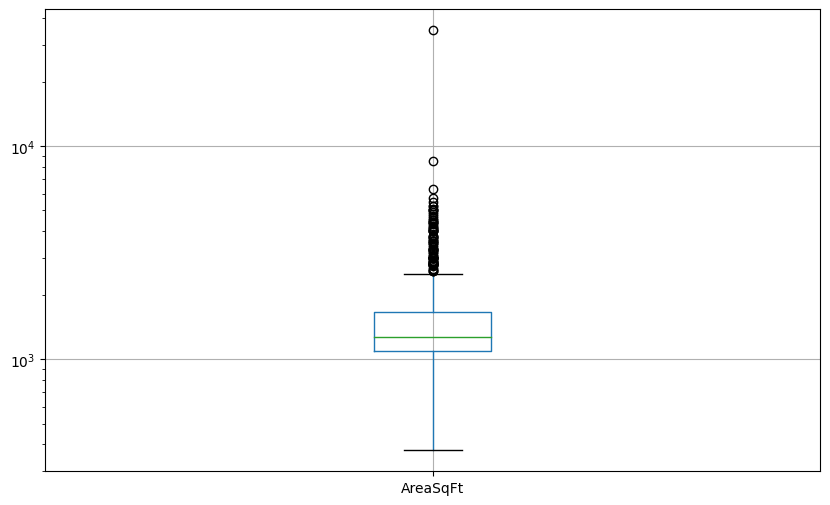

In [55]:
# Handling outlier
fig=plt.figure(figsize=(10,6))
df.boxplot(column=['AreaSqFt'])
#plt.show
plt.semilogy()

 - Boxplot basically measure of how well distributed the data in a data set is.
 - This graph represents the minimum, maximum, median, first quartile and third quartile of AreaSqFt.

<ipython-input-56-af226b5786f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'BuildingType', palette = "rainbow", alpha = 0.7, data = df)


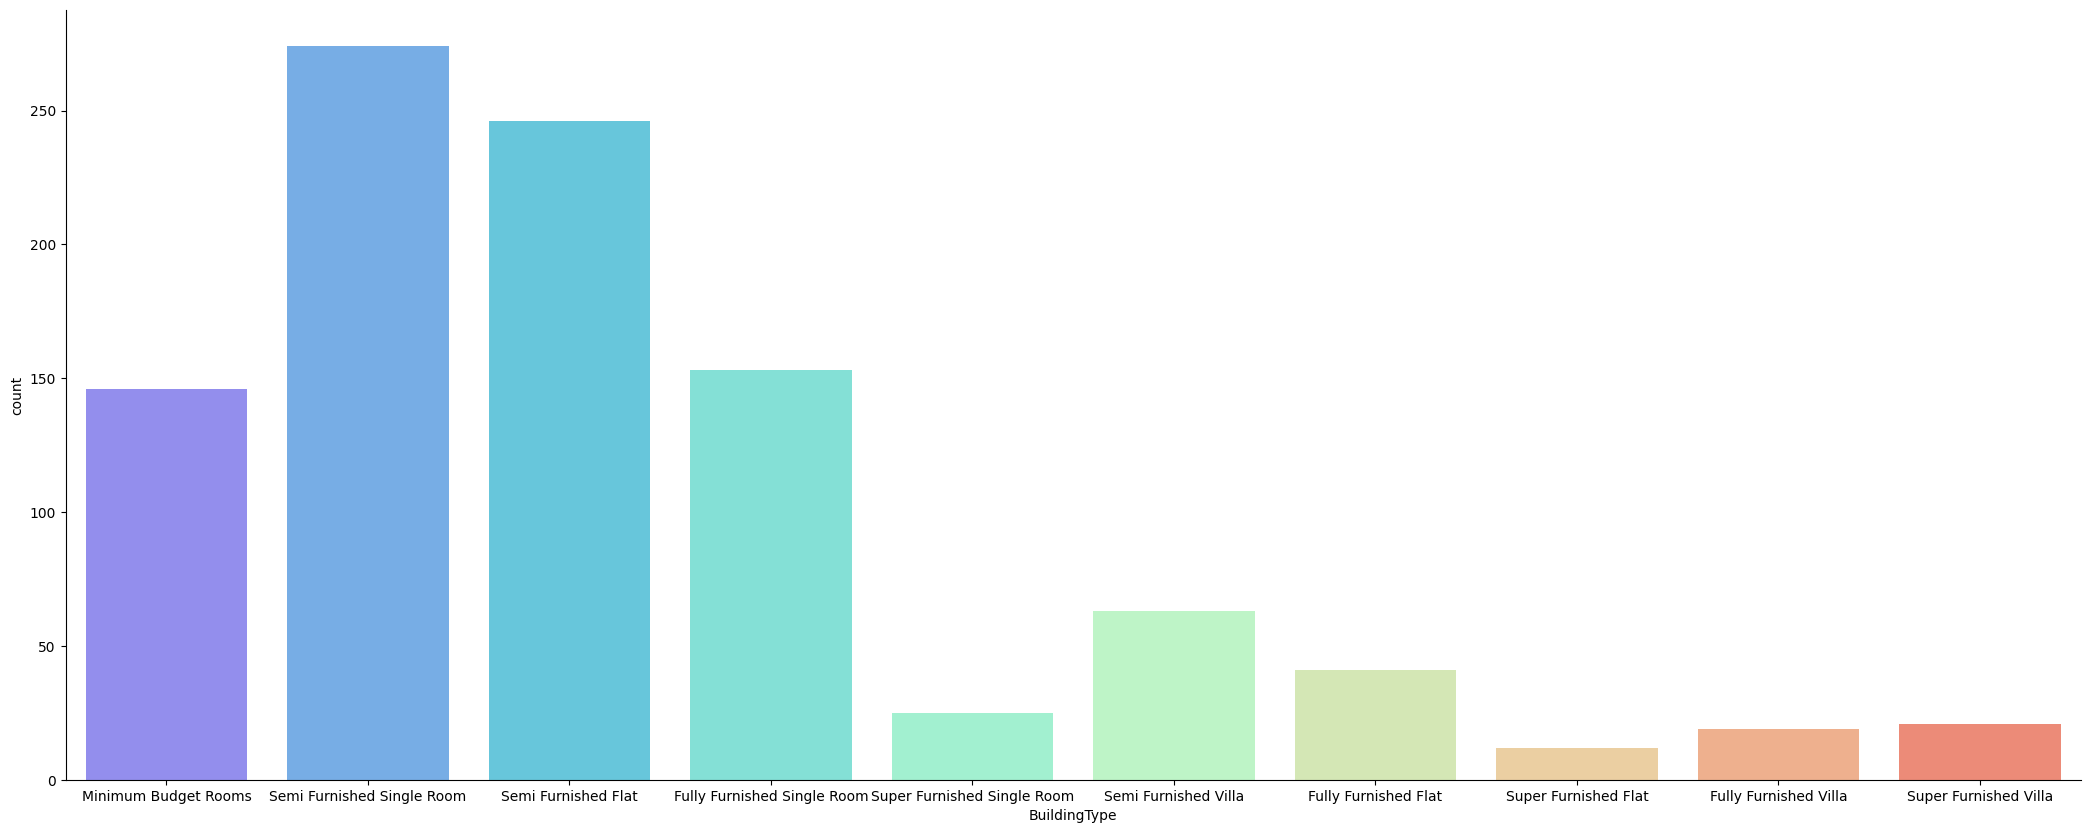

In [56]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'BuildingType', palette = "rainbow", alpha = 0.7, data = df)
sns.despine()

- From this countplot we can see that maximum house are Semi Furnished Single Room or Semi Furnished Flat.

<ipython-input-57-aa7d953b906a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Location', palette = "twilight", alpha = 0.7, data = df)


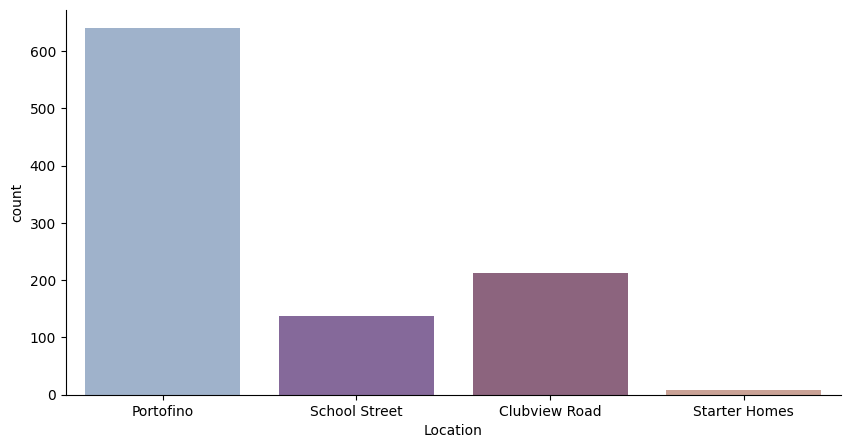

In [57]:
plt.figure(figsize = [10,5])
sns.countplot(x = 'Location', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

- From this countplot we can see that max houses are in Portofino street.

<ipython-input-58-26553372dcc8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Size', palette = "rainbow", alpha = 0.7, data = df)


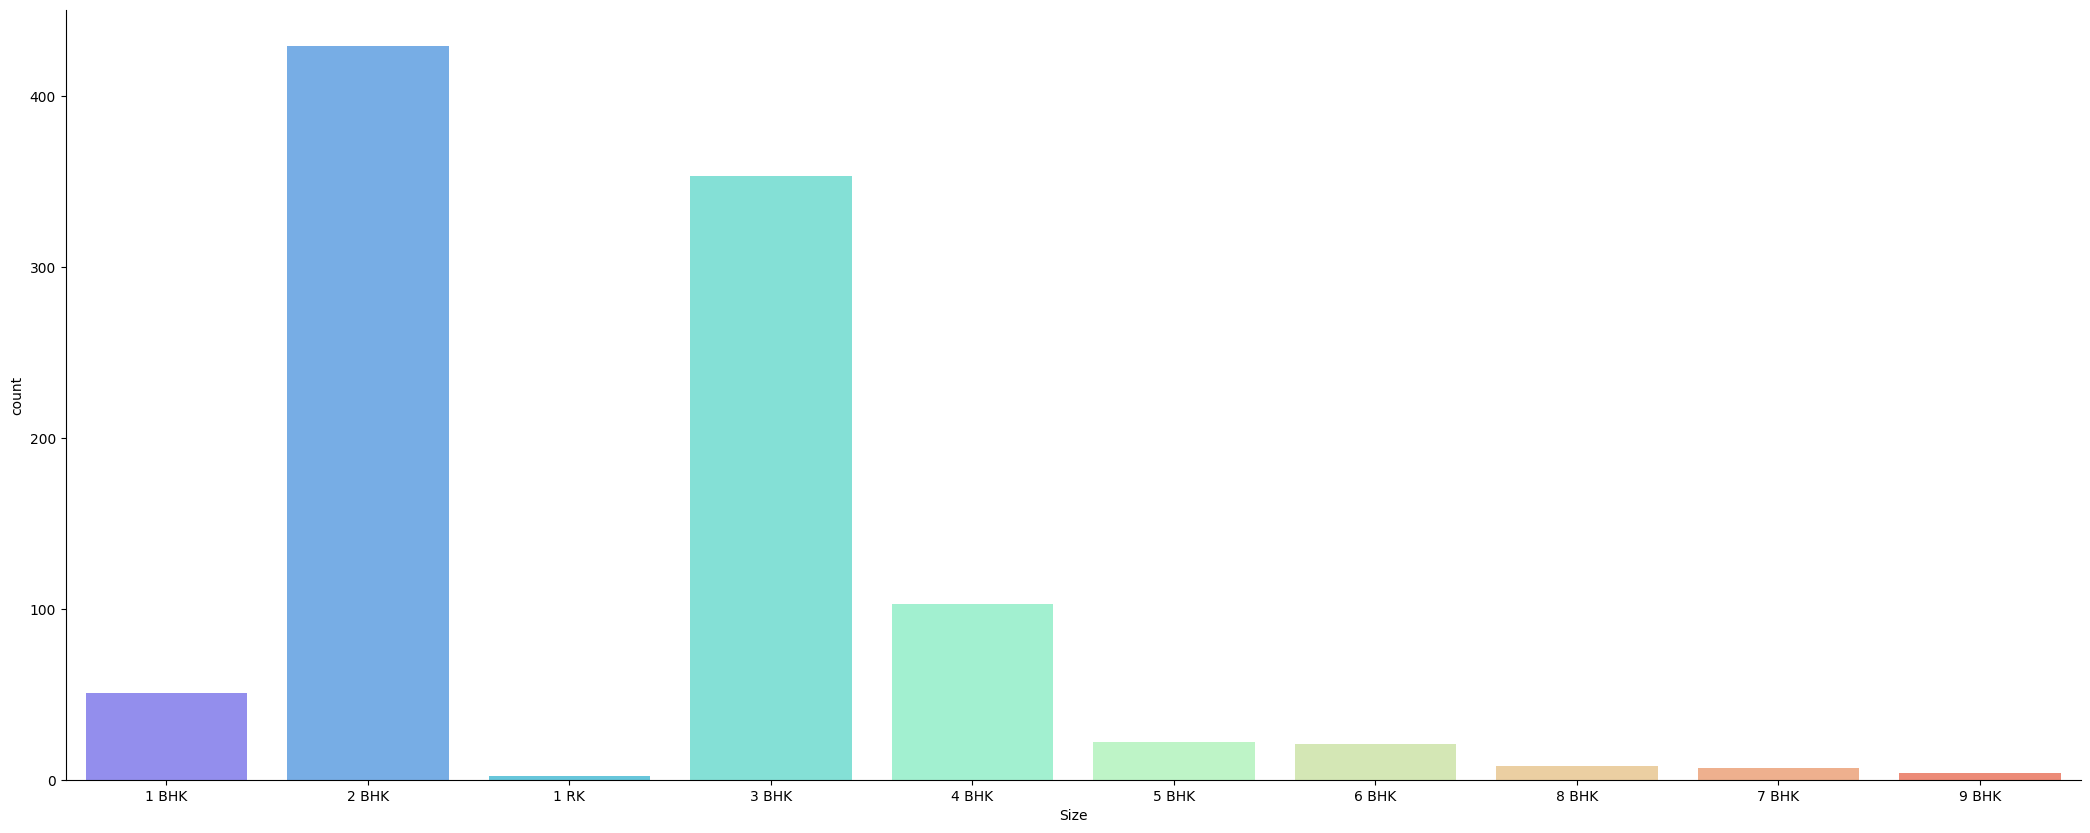

In [58]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'Size', palette = "rainbow", alpha = 0.7, data = df)
sns.despine()

- From this countplot we can see that maximum 2BHK and 3BHK houses are there in Lavasa.

In [59]:
Pie = df['BuildingType'].value_counts().reset_index()
Pie.columns = ['BuildingType','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'BuildingType', values = 'Percent', title = 'BuildingType', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

- From this piechart we can see that maximum house are Semi Furnished Single Room or Semi Furnished Flat.

In [60]:
Pie = df['Location'].value_counts().reset_index()
Pie.columns = ['Location','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Location', values = 'Percent', title = 'Location', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

In [61]:
Pie = df['Size'].value_counts().reset_index()
Pie.columns = ['Size','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Size', values = 'Percent', title = 'Size', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

- From this piechart we can see that maximum 2BHK and 3BHK houses are there in Lavasa.

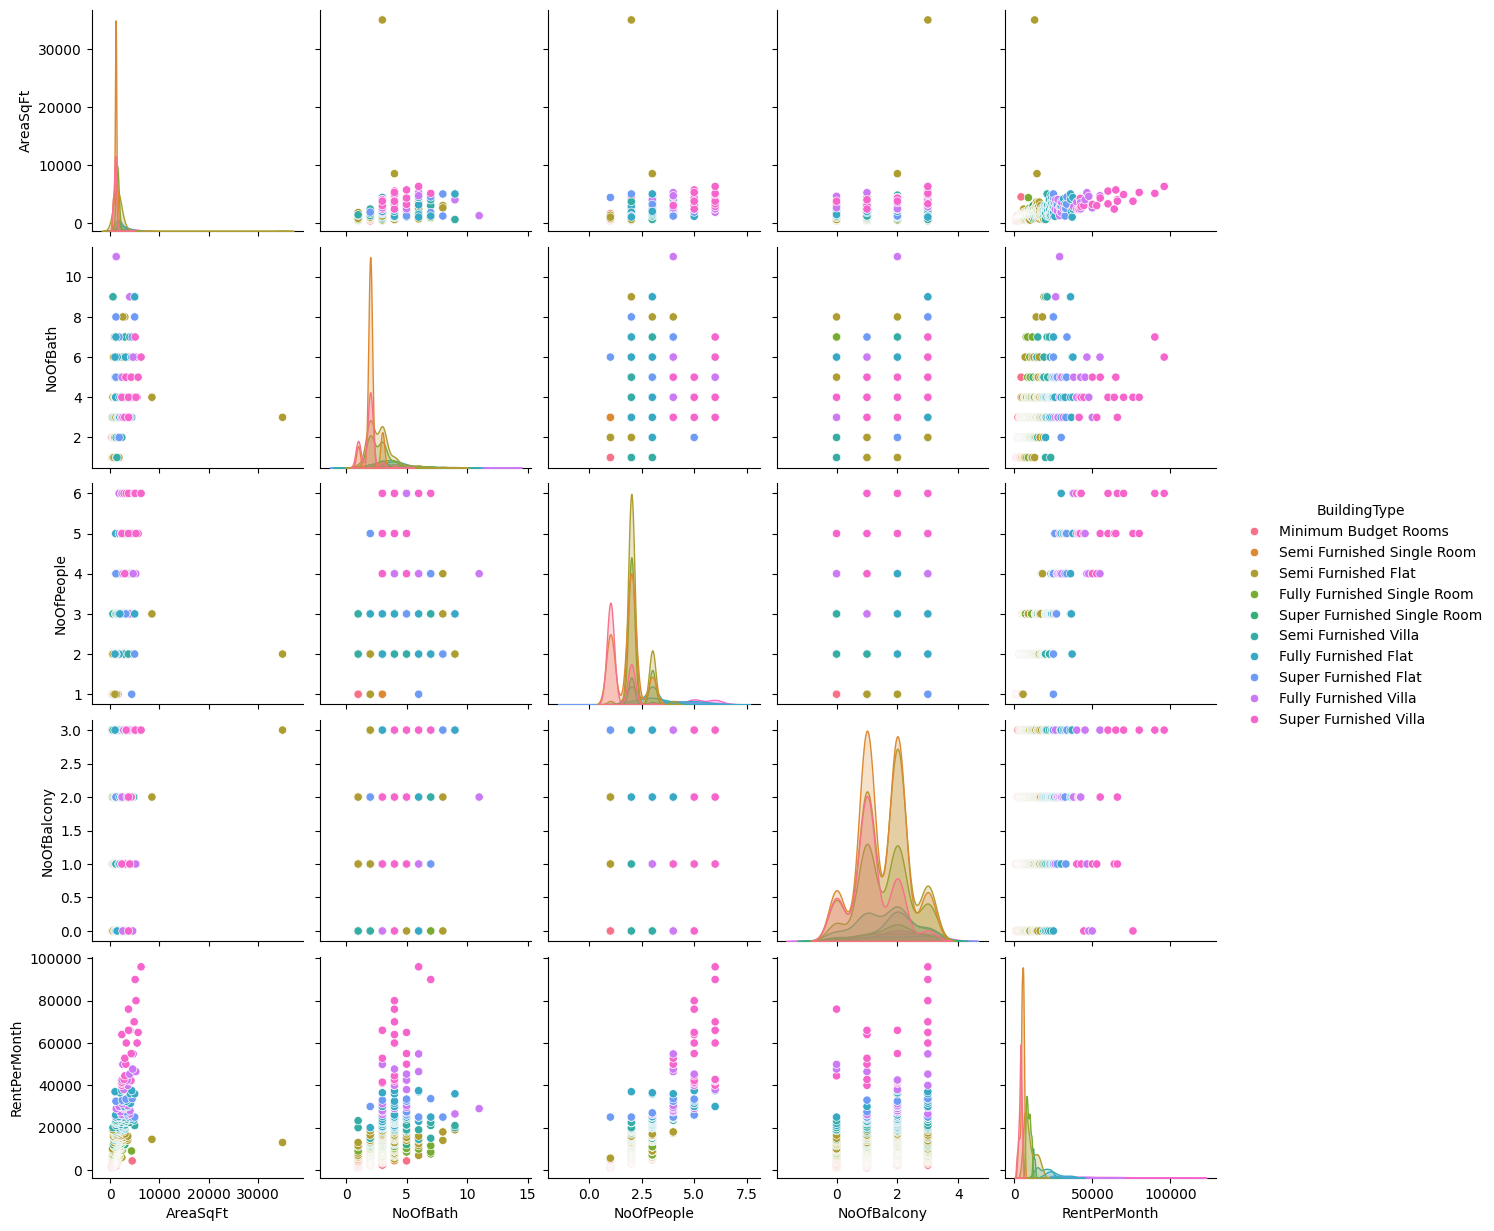

In [62]:
sns.set_palette("Spectral")
sns.pairplot(df,hue='BuildingType')

 - Pairplot shows pairwise relationships in a dataset.

<Axes: >

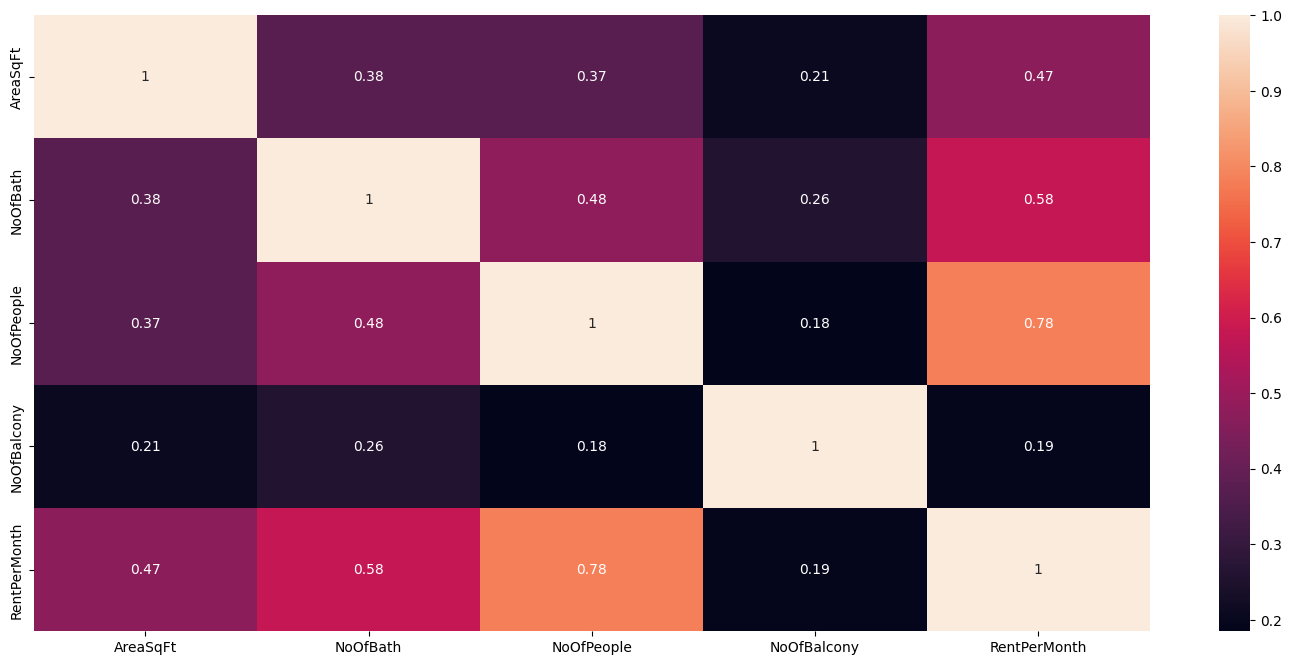

In [108]:
plt.figure(figsize = [18,8])
dfCor=df[['AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony','RentPerMonth']]
sns.heatmap(dfCor.corr(),annot=True)

 - It shows the correlation between each column.
 - Here we can see that RentPerMonth is strongly depend on NoOfPeople

<Figure size 3500x1000 with 0 Axes>

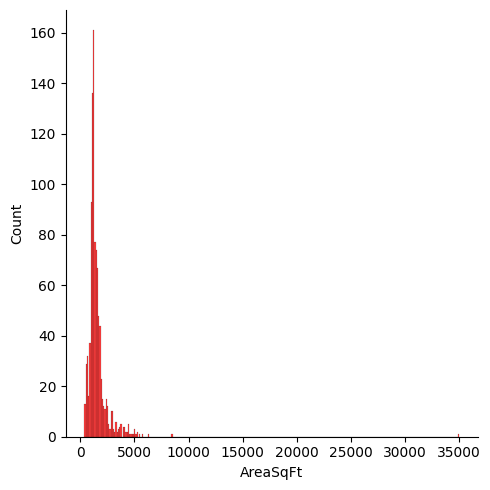

In [99]:
plt.figure(figsize=(35,10))
sns.displot(df['AreaSqFt'], color = 'red')

 - The area sqaure feet of major rental properties is ranging between 400 to 2500 area sq. ft.

<Figure size 3500x1000 with 0 Axes>

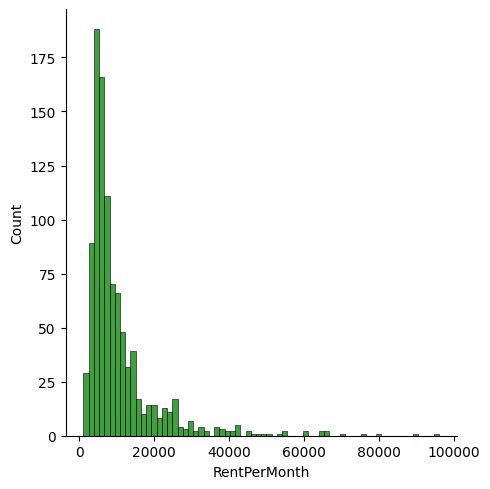

In [103]:
plt.figure(figsize=(35,10))
sns.displot(df['RentPerMonth'], color = 'green')

- The rent for major properties lie under the range of Rs 1100 to Rs 10000.

<Axes: xlabel='Location', ylabel='Count'>

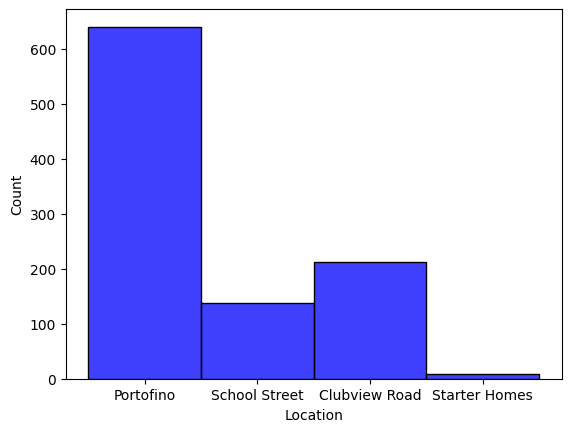

In [68]:
sns.histplot(x='Location',data=df,color='blue')

<Axes: xlabel='Size', ylabel='Count'>

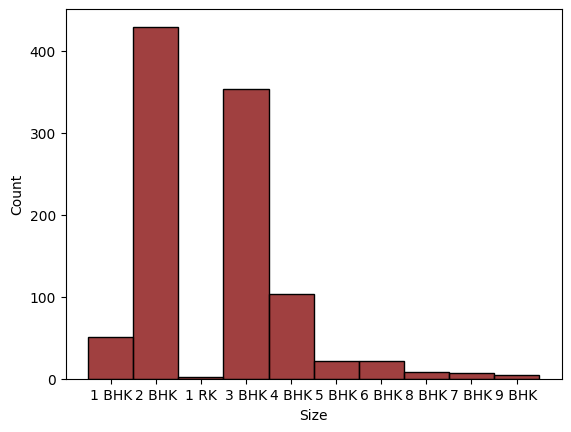

In [69]:
sns.histplot(x='Size',data=df,color='maroon')

- Most of the houses are 2BHK and 3BHK.

<Axes: xlabel='AreaSqFt', ylabel='Density'>

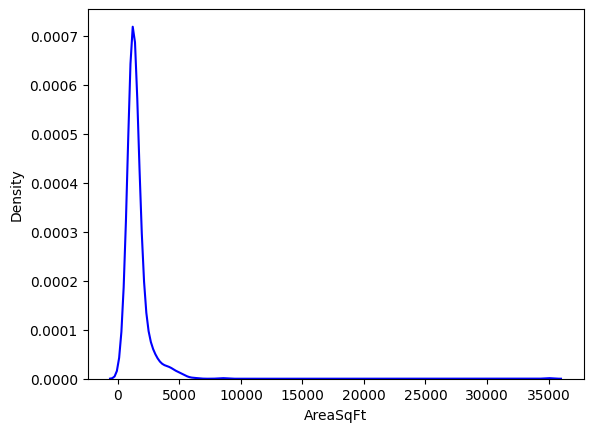

In [70]:
# distribution
sns.kdeplot(x='AreaSqFt',data=df,color='blue')

- This kdeplot shows the distribution of AreaSqFt.

<Axes: xlabel='AreaSqFt', ylabel='RentPerMonth'>

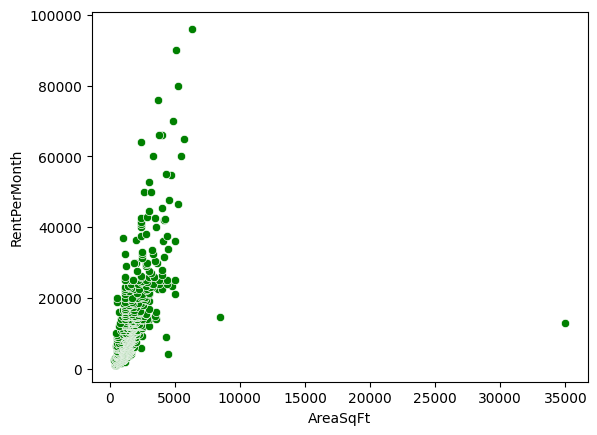

In [71]:
sns.scatterplot(x="AreaSqFt",y='RentPerMonth',data=df,color='green')

- This scatterplot helps to identify cluster.

<Axes: xlabel='Size', ylabel='NoOfBath'>

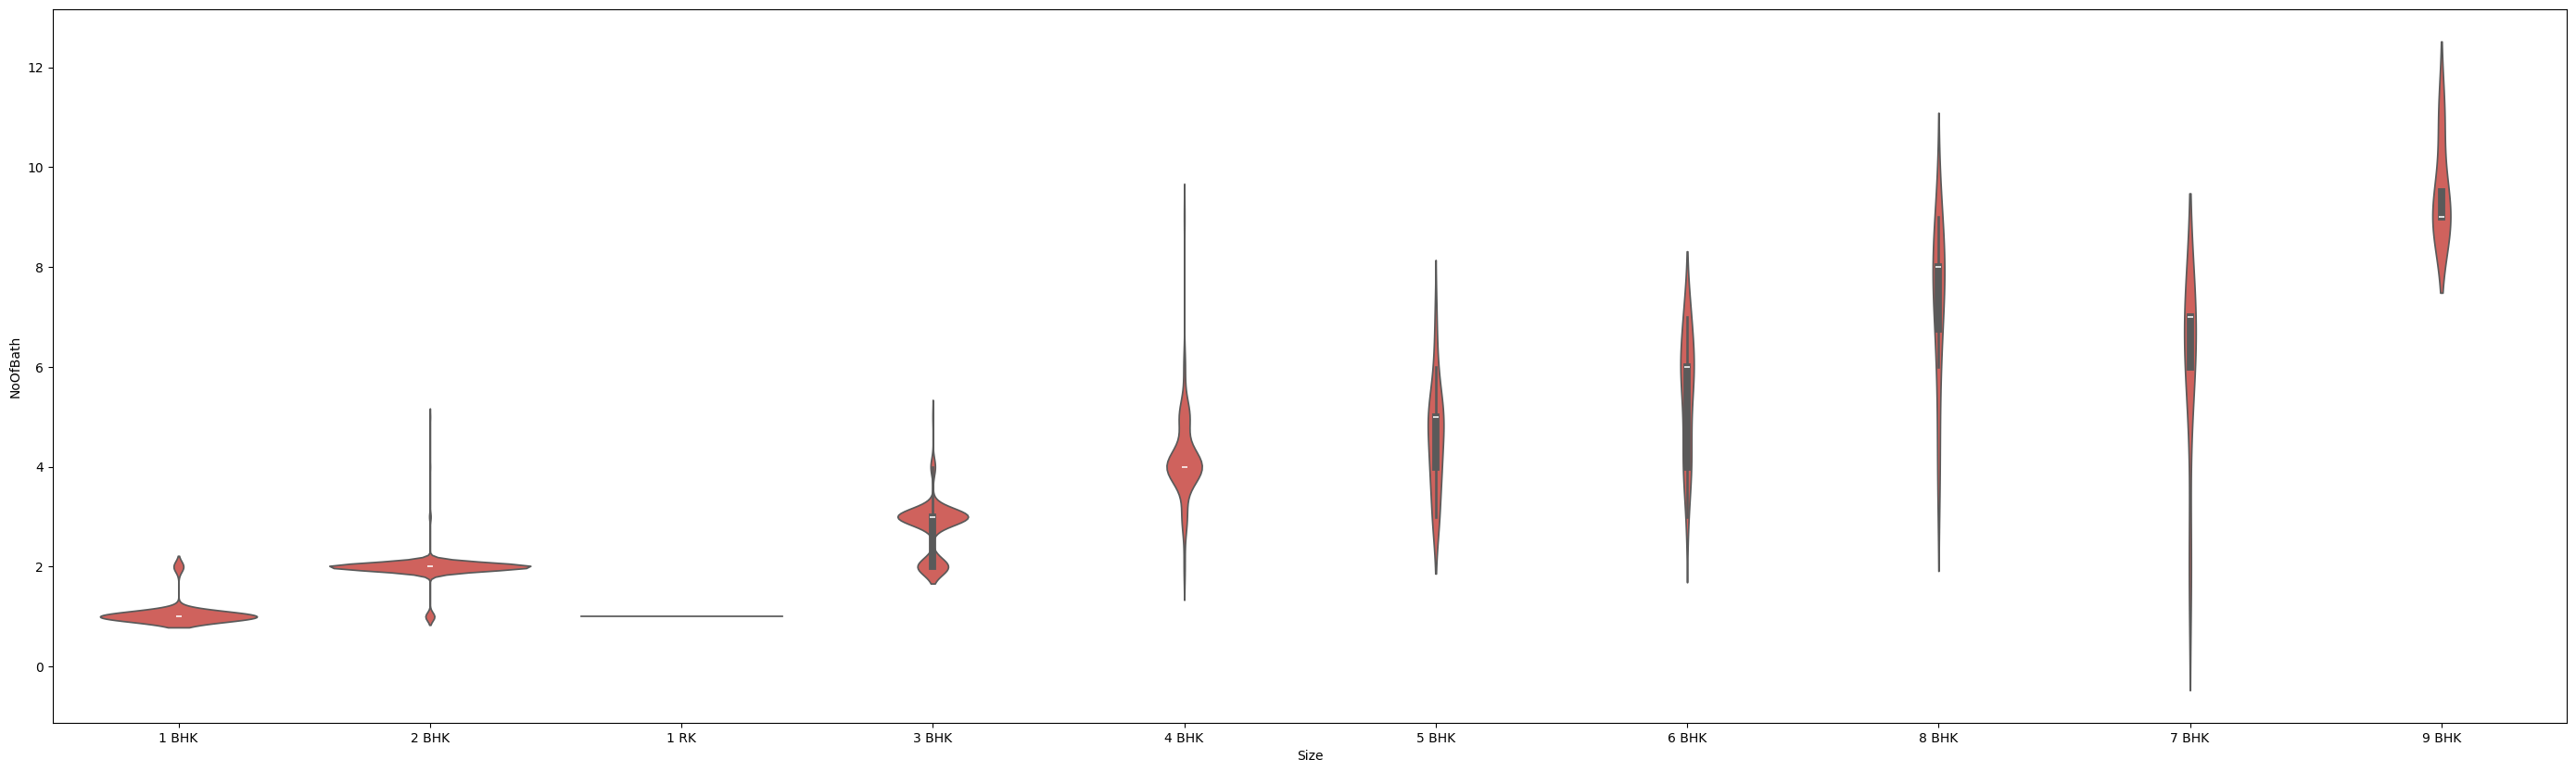

In [72]:
fig=plt.figure(figsize=(35,10))
sns.violinplot(x=df["Size"],y=df["NoOfBath"])

- Violinplot shows the probability density of the data at different values.
 - It shows that the distribution of each BHK and Rk house at each point.

**Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.**

In [73]:
# Initialising X and y arrays
X=df[['BuildingType','Location','Size','AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony']]
y=df["RentPerMonth"]

 - datapreprocessing

In [74]:
# Total value counts of each house
df["BuildingType"].value_counts()

,count
BuildingType,
Semi Furnished Single Room,274
Semi Furnished Flat,246
Fully Furnished Single Room,153
Minimum Budget Rooms,146
Semi Furnished Villa,63
Fully Furnished Flat,41
Super Furnished Single Room,25
Super Furnished Villa,21
Fully Furnished Villa,19


In [75]:
# Showing all unique house
df["BuildingType"].unique()

array(['Minimum Budget Rooms', 'Semi Furnished Single Room',
       'Semi Furnished Flat', 'Fully Furnished Single Room',
       'Super Furnished Single Room', 'Semi Furnished Villa',
       'Fully Furnished Flat', 'Super Furnished Flat',
       'Fully Furnished Villa', 'Super Furnished Villa'], dtype=object)

In [76]:
# Showing all unique size
df['Size'].unique()

array(['1 BHK', '2 BHK', '1 RK', '3 BHK', '4 BHK', '5 BHK', '6 BHK',
       '8 BHK', '7 BHK', '9 BHK'], dtype=object)

In [77]:
# Total value counts of each size
df['Size'].value_counts()

,count
Size,
2 BHK,429
3 BHK,353
4 BHK,103
1 BHK,51
5 BHK,22
6 BHK,21
8 BHK,8
7 BHK,7
9 BHK,4


In [78]:
# Changing categories to binary values
one_hot_encoded_data = pd.get_dummies(X, columns = ['BuildingType', 'Location'])

In [79]:
X1=one_hot_encoded_data
X1

,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,BuildingType_Fully Furnished Flat,BuildingType_Fully Furnished Single Room,BuildingType_Fully Furnished Villa,BuildingType_Minimum Budget Rooms,BuildingType_Semi Furnished Flat,BuildingType_Semi Furnished Single Room,BuildingType_Semi Furnished Villa,BuildingType_Super Furnished Flat,BuildingType_Super Furnished Single Room,BuildingType_Super Furnished Villa,Location_Clubview Road,Location_Portofino,Location_School Street,Location_Starter Homes
0,1 BHK,400.0,1,1,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,1 BHK,450.0,1,1,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,1 BHK,530.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,1 BHK,400.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,2 BHK,460.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4 BHK,4900.0,4,6,3,False,False,False,False,False,False,False,False,False,True,False,True,False,False
996,4 BHK,3750.0,4,5,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False
997,4 BHK,5270.0,4,5,3,False,False,False,False,False,False,False,False,False,True,False,False,True,False
998,6 BHK,5100.0,7,6,3,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [80]:
X1

,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,BuildingType_Fully Furnished Flat,BuildingType_Fully Furnished Single Room,BuildingType_Fully Furnished Villa,BuildingType_Minimum Budget Rooms,BuildingType_Semi Furnished Flat,BuildingType_Semi Furnished Single Room,BuildingType_Semi Furnished Villa,BuildingType_Super Furnished Flat,BuildingType_Super Furnished Single Room,BuildingType_Super Furnished Villa,Location_Clubview Road,Location_Portofino,Location_School Street,Location_Starter Homes
0,1 BHK,400.0,1,1,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,1 BHK,450.0,1,1,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,1 BHK,530.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,1 BHK,400.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,2 BHK,460.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4 BHK,4900.0,4,6,3,False,False,False,False,False,False,False,False,False,True,False,True,False,False
996,4 BHK,3750.0,4,5,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False
997,4 BHK,5270.0,4,5,3,False,False,False,False,False,False,False,False,False,True,False,False,True,False
998,6 BHK,5100.0,7,6,3,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [81]:
# Creating some empty list
t_size=[]
norm=[]
reg_score=[]
reg_intercept=[]
test_mae=[]
test_mse=[]
test_r2=[]
test_rmse=[]
train_mae = []
train_r2 = []
train_mse = []
train_rmse = []

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1.Size = le.fit_transform(X1.Size)
X1


,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,BuildingType_Fully Furnished Flat,BuildingType_Fully Furnished Single Room,BuildingType_Fully Furnished Villa,BuildingType_Minimum Budget Rooms,BuildingType_Semi Furnished Flat,BuildingType_Semi Furnished Single Room,BuildingType_Semi Furnished Villa,BuildingType_Super Furnished Flat,BuildingType_Super Furnished Single Room,BuildingType_Super Furnished Villa,Location_Clubview Road,Location_Portofino,Location_School Street,Location_Starter Homes
0,0,400.0,1,1,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,0,450.0,1,1,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0,530.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,0,400.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,2,460.0,1,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,4900.0,4,6,3,False,False,False,False,False,False,False,False,False,True,False,True,False,False
996,4,3750.0,4,5,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False
997,4,5270.0,4,5,3,False,False,False,False,False,False,False,False,False,True,False,False,True,False
998,6,5100.0,7,6,3,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [109]:
# Creating a LinearRegressor model to finding error and accuracy
test_size=0.5
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=test_size,random_state=42)
reg=LinearRegression()
reg.fit(X_train, y_train)
print("Regression score: ",reg.score(X_test, y_test))
print("Regression intercept: ",reg.intercept_)
print("coef: ",reg.coef_)
print("param: ",reg.get_params(deep=True))

y_pred=reg.predict(X_test)
train_pred = reg.predict(X_train)

print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, train_pred))
print("MSE: ",mean_squared_error(y_train, train_pred))
print("r2: ",r2_score(y_train, train_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, train_pred)))


print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# Append all these in above empty list
t_size.append(test_size)
norm.append(False)
reg_score.append(reg.score(X_test, y_test))
reg_intercept.append(reg.intercept_)
test_mae.append(mean_absolute_error(y_test, y_pred))
test_mse.append(mean_squared_error(y_test, y_pred))
test_r2.append(r2_score(y_test, y_pred))
test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


train_mae.append(mean_absolute_error(y_train, train_pred))
train_mse.append(mean_squared_error(y_train, train_pred))
train_r2.append(r2_score(y_train, train_pred))
train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))

Regression score:  0.9048383940587583
Regression intercept:  11555.97940083982
coef:  [ 3.44319452e+02  3.58983412e-01  8.47387710e+02  1.50030364e+03
  8.69492795e+00  4.57624679e+03 -1.04538601e+04  1.53129372e+04
 -1.25461509e+04 -9.40485027e+03 -1.28519472e+04 -3.39384573e+03
  3.62972726e+03 -7.01618037e+03  3.21479234e+04  4.29151322e+02
  8.32620515e+02 -5.09543566e+02 -7.52228270e+02]
param:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
For Training Data 
 --------------------------------
MAE:  1977.021960817893
MSE:  11874254.604683803
r2:  0.8889938202072095
RMSE:  3445.904033005534
For Test Data 
 --------------------------------
MAE:  1884.6849666149938
MSE:  10808695.930758016
r2:  0.9048383940587583
RMSE:  3287.658122548331


In [110]:
# Create a dataframe and compare between actual and predicted values
df2=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
521,7350.0,8798.271683
737,11300.0,9134.899367
740,11500.0,7995.756899
660,9500.0,10114.187106
411,6000.0,8132.651719
...,...,...
178,4400.0,2512.017179
444,6500.0,5351.454380
416,6100.0,5284.299090
870,18500.0,8923.636220


# Conclusion:
 - In this Notebook, I have tried to gain the knowledge about data and its varibles, further I did some preprocessing to the data in order to bring it into more analyst friendly mode, later I implemented various graphs using various libraries in order to get valuable insights, furthermore, I implemented and evaluated LinearRegression model to get high accuracy in term of predicting rental price to find houses for people.